In [63]:
%run algorithms/countours.py # run functions from  separate file: countours.py in directory algorithms

import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

def analyze(inputdir, fn, x, n): 
    """Returns dataframe (columns: image, expected, result, diff) and coefficient of determination value.
    inputdir - directory with photo and csv file with columns: image,expected
    fn - your algorithm which counts cells"""
    
    comparison = pd.read_csv(f"{inputdir}/test.csv")
    comparison = comparison.iloc[x:n]
    comparison["result"] = comparison["image"].apply(lambda path: fn(f"{inputdir}/{path}")) # implements your counting algorythm for each image
    comparison["diff"] = comparison["result"]-comparison["expected"] # counts difference between expected and result
    r2 = r2_score(comparison["expected"], comparison["result"]) # returns R^2 (coefficient of determination) regression score function
    print(comparison.describe())
    print("Coefficient of determination: " + str(r2)) # 1.0 is the best score
    return comparison # comparison is dataframe

# tip: how to prepare your function to testing - example using Monika's algorythm:
# def countours(filepath):
#     return _countours(filepath, 60, 10, imshow=True)


#print(analyze(folder_path, counting_algorythm)) # in this place you have to write folder_name and counting_algorythm's name
#sns.catplot(x="image", y="diff", data=result, height=8, aspect=2) # plot- if dot is in 0 on y axis - it means that algorytm counted True value




# Algorythm countours
### Chinese Hamster Ovary Cells
link to source:  https://data.broadinstitute.org/bbbc/BBBC030/

### Method: Countour detection based on binary photo, filtering obecjt's size, using cv2 library. 
Tresholf and size filter optimised by hand to recieve the best results for this photos series.

- Sample size: 20 photos
- Coefficient of determination: 0.9149194773625038 (1.0 is the best result)
- mean number of cells in the photo expected: 12.15, result: 12.35
- std. expected: 2.94, result: 2.97
- range of difeerences between error: 4 (-1:2), mean error 0.2

### Conclusions: 
This method is proper to count:
- cells with the same size and shape
- cells that are not connected to each other
- image photo made by the same technique and the same scale

        expected     result       diff
count  20.000000  20.000000  20.000000
mean   12.150000  12.350000   0.200000
std     2.942877   2.978431   0.833509
min     7.000000   7.000000  -1.000000
25%    10.000000  10.000000   0.000000
50%    12.000000  12.000000   0.000000
75%    13.500000  14.250000   1.000000
max    19.000000  19.000000   2.000000
Coefficient of determination: 0.9149194773625038
        image  expected  result  diff
0   cho01.png        16      17     1
1   cho02.png        11      10    -1
2   cho03.png        12      11    -1
3   cho04.png        15      14    -1
4   cho05.png         7       7     0
5   cho06.png        13      13     0
6   cho07.png        19      19     0
7   cho08.png        13      14     1
8   cho09.png         9      10     1
9   cho10.png         8       9     1
10  cho11.png        12      12     0
11  cho12.png        15      15     0
12  cho13.png        15      15     0
13  cho14.png        12      12     0
14  cho15.png         9      1

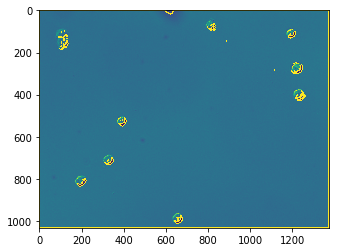

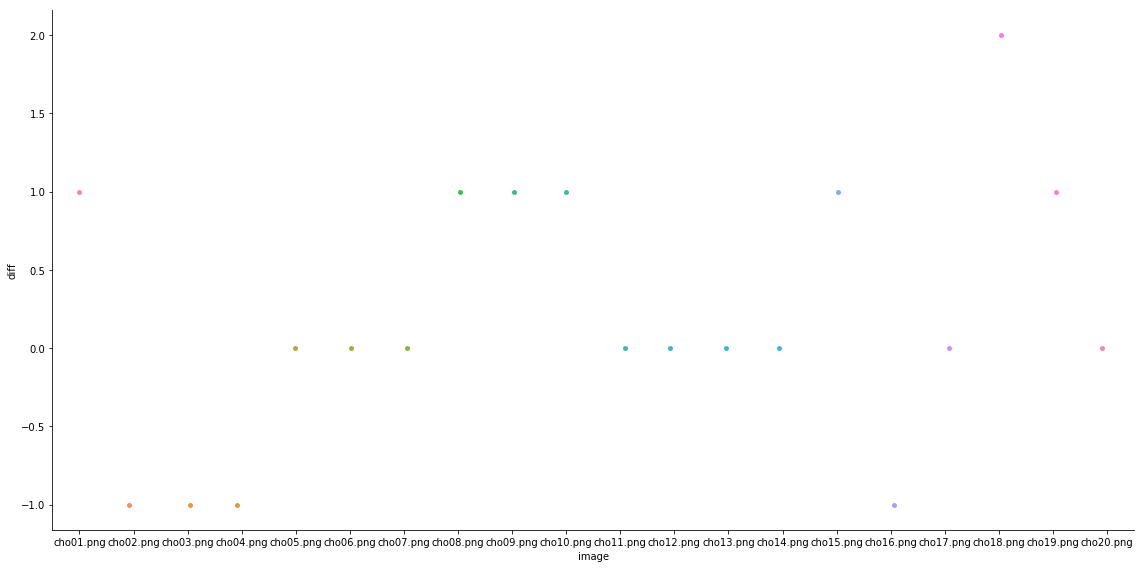

In [64]:
# treshold can be form 30-200 to properly count cells. It's impossible

def countours(filepath):
    return _countours(filepath, 60, 30, imshow=True)
x=0
n=70
comparison = analyze("data_Adrian", countours, x, n)# in this place you have to write folder_name and counting_algorythm's name
print(comparison)
sns.catplot(x="image", y="diff", data=comparison, height=8, aspect=2) # plot- if dot is in 0 on y axis - it means that algorytm counted True value
